In [1]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import glob
import PIL
import random

random.seed(100)

In [2]:
breast_imgs = glob.glob('C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [3]:
for imgname in breast_imgs[:5]:
    print(imgname)

C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
C:/Users/AIMVLab/Desktop/flodo/CNN_Breast Cancer/Histopathology/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png


In [4]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0' :
        non_cancer_imgs.append(img)
    
    elif img[-5] == '1' :
        cancer_imgs.append(img)

In [5]:
non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer 
        
total_img_num = non_cancer_num + cancer_num
        
print('Number of Images of no cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(cancer_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


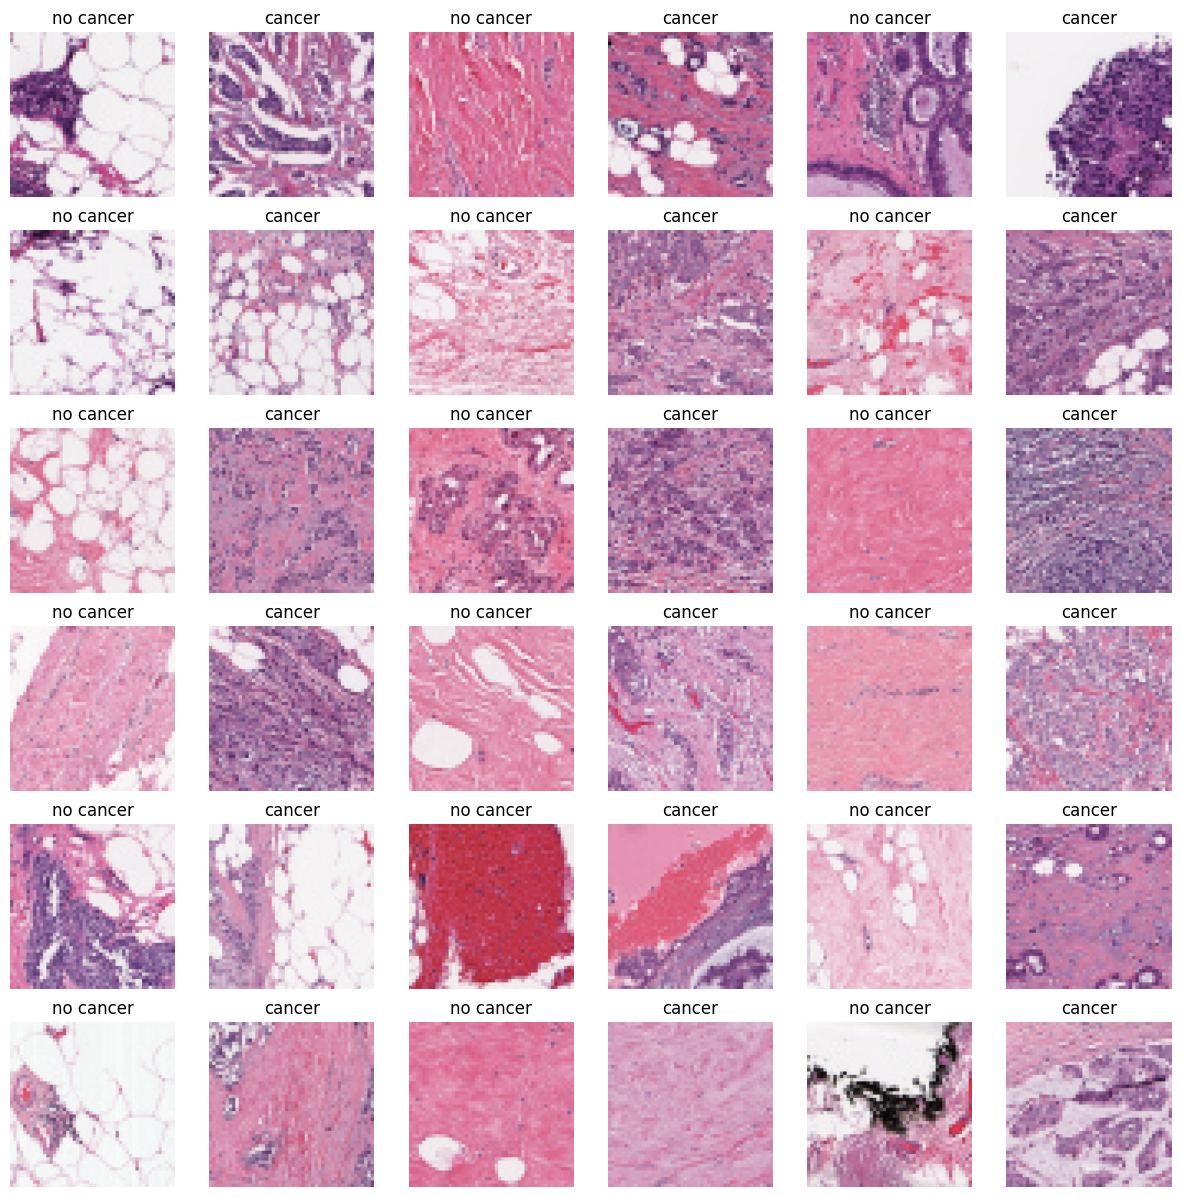

In [6]:
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_cancer_imgs), 18)
some_can = np.random.randint(0, len(cancer_imgs), 18)

s = 0
for num in some_non:
    
        img = image.image_utils.load_img((non_cancer_imgs[num]), target_size=(100, 100))
        img = image.image_utils.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    img = image.image_utils.load_img((cancer_imgs[num]), target_size=(100, 100))
    img = image.image_utils.img_to_array(img)
    plt.subplot(6, 6, 2*s)
    plt.axis('off')        
    plt.title('cancer')
    plt.imshow(img.astype('uint8'))
    s += 1

In [7]:
import cv2
import numpy as np
import random

# Randomly sample images from two lists, 'non_cancer_imgs' and 'cancer_imgs'
some_non_img = random.sample(non_cancer_imgs, len(non_cancer_imgs))
some_can_img = random.sample(cancer_imgs, len(cancer_imgs))

# Initialize empty arrays to store image data and labels
non_img_arr = []  # Array for non-cancer images
can_img_arr = []  # Array for cancer images

# Loop through each image in the 'some_non_img' list
for img in some_non_img:
    # Read the image in color mode
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # Resize the image to a fixed size (50x50 pixels) using linear interpolation
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # Append the resized image and label 0 (indicating non-cancer) to the 'non_img_arr'
    non_img_arr.append([n_img_size, 0])
    
# Loop through each image in the 'some_can_img' list
for img in some_can_img:
    # Read the image in color mode
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # Resize the image to a fixed size (50x50 pixels) using linear interpolation
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # Append the resized image and label 1 (indicating cancer) to the 'can_img_arr'
    can_img_arr.append([c_img_size, 1])

# Combine non-cancer and cancer data
breast_img_arr = non_img_arr + can_img_arr

# Shuffle the combined array randomly
random.shuffle(breast_img_arr)

# Initialize lists for images and labels
X = []
y = []

# Loop through each element (image, label) in the shuffled 'breast_img_arr'
for feature, label in breast_img_arr:
    # Append the image data (feature) to the 'X' list
    X.append(feature)
    # Append the label to the 'y' list
    y.append(label)
    
# Convert the lists 'X' and 'y' into NumPy arrays
X = np.array(X)
y = np.array(y)

# Print the shape of the 'X' array
print('X shape: {}'.format(X.shape))


X shape: (277524, 50, 50, 3)


In [8]:
# Split the dataset into training and testing sets, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# # Define a rate (percentage) for subsampling the training data
# rate = 0.5

# # Calculate the number of samples to keep in the training data based on the rate
# num = int(X.shape[0] * rate)

# Convert the categorical labels in 'y_train' and 'y_test' to one-hot encoded format
y_train = to_categorical(y_train, 2)  # Assuming there are 2 classes (non-cancer and cancer)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('X_val shape : {}' .format(X_val.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))
print('y_val shape : {}' .format(y_val.shape))

X_train shape : (222019, 50, 50, 3)
X_test shape : (27753, 50, 50, 3)
X_val shape : (27752, 50, 50, 3)
y_train shape : (222019, 2)
y_test shape : (27753, 2)
y_val shape : (27752, 2)


In [9]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# # Data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Create data generators for training and testing
# train_datagen = datagen.flow(X_train, y_train, batch_size=64)
# val_datagen = datagen.flow(X_val, y_val, batch_size=64)
# test_datagen = datagen.flow(X_test, y_test, batch_size=64, shuffle=False)

In [10]:
# # Fetch one batch of augmented images and labels
# X_batch, y_batch = next(train_datagen)

# # Print the shapes of the augmented images and labels
# print("Shape of augmented image batch:", X_batch.shape)
# print("Shape of augmented label batch:", y_batch.shape)

In [11]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

In [12]:
# Input layer for high-resolution pathology images
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

# EfficientNet-B4 backbone (feature extractor)
efficientnet = EfficientNetB4(include_top=False, input_tensor=inputs, weights="imagenet")
x = efficientnet.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Apply global average pooling to reduce dimensions

# Transformer Block
# Add a transformer encoder layer after feature extraction
num_heads = 4  # Number of attention heads
embed_dim = x.shape[-1]  # Dimensionality of the features extracted by EfficientNet
ff_dim = 512  # Feed-forward layer size in transformer

# Expand dimensions for multi-head attention
x = tf.expand_dims(x, axis=1)  # Add time dimension for multi-head attention

# Multi-Head Attention Layer
attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
attention_output = Dropout(0.1)(attention_output)  # Dropout for regularization
attention_output = Add()([x, attention_output])  # Residual connection
attention_output = LayerNormalization(epsilon=1e-6)(attention_output)


In [13]:
# Feed-Forward Network
ffn = Dense(ff_dim, activation="relu")(attention_output)
ffn = Dense(embed_dim)(ffn)
x = Add()([attention_output, ffn])  # Residual connection
x = LayerNormalization(epsilon=1e-6)(x)
x = tf.squeeze(x, axis=1)  # Remove the time dimension for final classification

# Fully Connected Layers
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)

# Output Layer for binary classification (cancerous vs non-cancerous)
outputs = Dense(2, activation="softmax")(x)
# Model Definition
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 50, 50, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 50, 50, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 50, 50, 3)    0           ['normalization[0][0]']          
                                                                                              

                                                                                                  
 block2a_dwconv_pad (ZeroPaddin  (None, 27, 27, 144)  0          ['block2a_expand_activation[0][0]
 g2D)                                                            ']                               
                                                                                                  
 block2a_dwconv (DepthwiseConv2  (None, 13, 13, 144)  1296       ['block2a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block2a_bn (BatchNormalization  (None, 13, 13, 144)  576        ['block2a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2a_a

 block2c_activation (Activation  (None, 13, 13, 192)  0          ['block2c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block2c_se_squeeze (GlobalAver  (None, 192)         0           ['block2c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2c_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block2c_se_squeeze[0][0]']     
                                                                                                  
 block2c_se_reduce (Conv2D)     (None, 1, 1, 8)      1544        ['block2c_se_reshape[0][0]']     
                                                                                                  
 block2c_s

                                                                                                  
 block3a_se_squeeze (GlobalAver  (None, 192)         0           ['block3a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3a_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block3a_se_squeeze[0][0]']     
                                                                                                  
 block3a_se_reduce (Conv2D)     (None, 1, 1, 8)      1544        ['block3a_se_reshape[0][0]']     
                                                                                                  
 block3a_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block3a_se_reduce[0][0]']      
                                                                                                  
 block3a_s

 block3c_se_excite (Multiply)   (None, 7, 7, 336)    0           ['block3c_activation[0][0]',     
                                                                  'block3c_se_expand[0][0]']      
                                                                                                  
 block3c_project_conv (Conv2D)  (None, 7, 7, 56)     18816       ['block3c_se_excite[0][0]']      
                                                                                                  
 block3c_project_bn (BatchNorma  (None, 7, 7, 56)    224         ['block3c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3c_drop (Dropout)         (None, 7, 7, 56)     0           ['block3c_project_bn[0][0]']     
                                                                                                  
 block3c_a

                                                                                                  
 block4a_project_conv (Conv2D)  (None, 4, 4, 112)    37632       ['block4a_se_excite[0][0]']      
                                                                                                  
 block4a_project_bn (BatchNorma  (None, 4, 4, 112)   448         ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 4, 4, 672)    75264       ['block4a_project_bn[0][0]']     
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, 4, 4, 672)   2688        ['block4b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block4d_expand_conv (Conv2D)   (None, 4, 4, 672)    75264       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 4, 4, 672)   2688        ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 4, 4, 672)   0           ['block4d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4d_dwconv (DepthwiseConv2  (None, 4, 4, 672)   6048        ['block4d_expand_activation[0][0]
 D)       

                                                                                                  
 block4f_expand_activation (Act  (None, 4, 4, 672)   0           ['block4f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4f_dwconv (DepthwiseConv2  (None, 4, 4, 672)   6048        ['block4f_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4f_bn (BatchNormalization  (None, 4, 4, 672)   2688        ['block4f_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4f_a

 block5b_activation (Activation  (None, 4, 4, 960)   0           ['block5b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5b_se_squeeze (GlobalAver  (None, 960)         0           ['block5b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5b_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5b_se_squeeze[0][0]']     
                                                                                                  
 block5b_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5b_se_reshape[0][0]']     
                                                                                                  
 block5b_s

                                                                                                  
 block5d_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5d_se_squeeze[0][0]']     
                                                                                                  
 block5d_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5d_se_reshape[0][0]']     
                                                                                                  
 block5d_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5d_se_reduce[0][0]']      
                                                                                                  
 block5d_se_excite (Multiply)   (None, 4, 4, 960)    0           ['block5d_activation[0][0]',     
                                                                  'block5d_se_expand[0][0]']      
                                                                                                  
 block5d_p

 block5f_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5f_se_reduce[0][0]']      
                                                                                                  
 block5f_se_excite (Multiply)   (None, 4, 4, 960)    0           ['block5f_activation[0][0]',     
                                                                  'block5f_se_expand[0][0]']      
                                                                                                  
 block5f_project_conv (Conv2D)  (None, 4, 4, 160)    153600      ['block5f_se_excite[0][0]']      
                                                                                                  
 block5f_project_bn (BatchNorma  (None, 4, 4, 160)   640         ['block5f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5f_d

 block6b_project_bn (BatchNorma  (None, 2, 2, 272)   1088        ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 2, 2, 272)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 2, 2, 272)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 2, 2, 1632)   443904      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 2, 2, 272)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block6e_expand_conv (Conv2D)   (None, 2, 2, 1632)   443904      ['block6d_add[0][0]']            
                                                                                                  
 block6e_expand_bn (BatchNormal  (None, 2, 2, 1632)  6528        ['block6e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6e_expand_activation (Act  (None, 2, 2, 1632)  0           ['block6e_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6g_expand_bn (BatchNormal  (None, 2, 2, 1632)  6528        ['block6g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6g_expand_activation (Act  (None, 2, 2, 1632)  0           ['block6g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6g_dwconv (DepthwiseConv2  (None, 2, 2, 1632)  40800       ['block6g_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6g_bn (BatchNormalization  (None, 2, 2, 1632)  6528        ['block6g_dwconv[0][0]']         
 )        

                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 2, 2, 1632)  14688       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 2, 2, 1632)  6528        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_activation (Activation  (None, 2, 2, 1632)  0           ['block7a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block7a_s

 add (Add)                      (None, 1, 1792)      0           ['tf.expand_dims[0][0]',         
                                                                  'dropout[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 1, 1792)     3584        ['add[0][0]']                    
 alization)                                                                                       
                                                                                                  
 dense (Dense)                  (None, 1, 512)       918016      ['layer_normalization[0][0]']    
                                                                                                  
 dense_1 (Dense)                (None, 1, 1792)      919296      ['dense[0][0]']                  
                                                                                                  
 add_1 (Ad

In [14]:

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)

# Start timer for training
start_time = time.time()
# Compile and train the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_val,y_val),
    callbacks=[early_stopping, plateau]
)

# Calculate total training time
end_time = time.time()
training_time = end_time - start_time
hours, rem = divmod(training_time, 3600)
minutes, seconds = divmod(rem, 60)
print(f"Training Time: {int(hours)} hours, {int(minutes)} minutes, and {int(seconds)} seconds.")

print("This is the End!!!")

Epoch 1/100
6939/6939 [==============================] - 599s 83ms/step - loss: 0.3343 - accuracy: 0.8635 - val_loss: 0.2629 - val_accuracy: 0.8929 - lr: 0.0010
Epoch 2/100
6939/6939 [==============================] - 581s 84ms/step - loss: 0.2929 - accuracy: 0.8819 - val_loss: 0.2550 - val_accuracy: 0.8942 - lr: 0.0010
Epoch 3/100
6939/6939 [==============================] - 363s 52ms/step - loss: 0.2655 - accuracy: 0.8931 - val_loss: 0.2350 - val_accuracy: 0.9008 - lr: 0.0010
Epoch 4/100
6939/6939 [==============================] - 312s 45ms/step - loss: 0.2505 - accuracy: 0.8981 - val_loss: 0.2328 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/100
6939/6939 [==============================] - 311s 45ms/step - loss: 0.2353 - accuracy: 0.9046 - val_loss: 0.2650 - val_accuracy: 0.8949 - lr: 0.0010
Epoch 6/100
6939/6939 [==============================] - 312s 45ms/step - loss: 0.2279 - accuracy: 0.9074 - val_loss: 0.2446 - val_accuracy: 0.8989 - lr: 0.0010
Epoch 7/100
6939/6939 [===========

In [24]:
model.evaluate(X_test,y_test)

868/868 [==============================] - 9s 11ms/step - loss: 0.2375 - accuracy: 0.8978


[0.23754402995109558, 0.897848904132843]

27753/27753 [==============================] - 241s 9ms/step


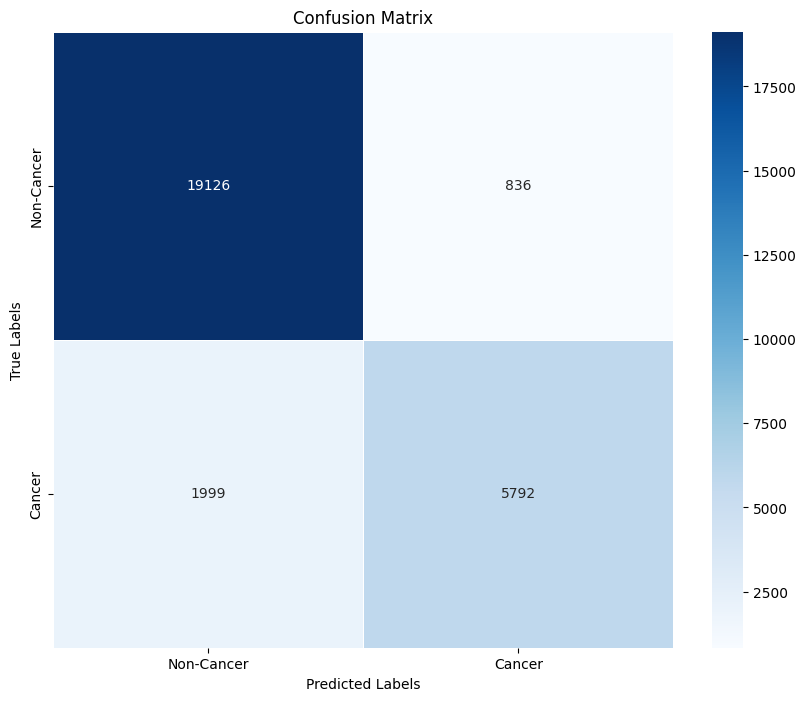

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict using the trained model
Y_pred = model.predict(X_test, steps=len(X_test))
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Extract true labels from the test generator
# This assumes that test_datagen is correctly set up with y_test
Y_true = np.argmax(y_test, axis=1)  # Modify this if your setup differs

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", linewidths=.5, cmap="Blues")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Cancer', 'Cancer'])
ax.yaxis.set_ticklabels(['Non-Cancer', 'Cancer'])
plt.show()


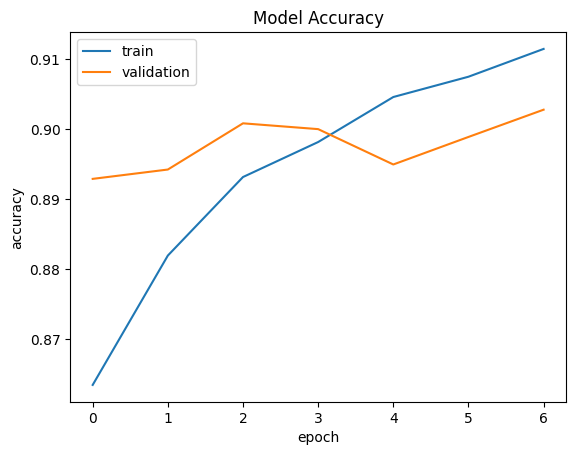

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

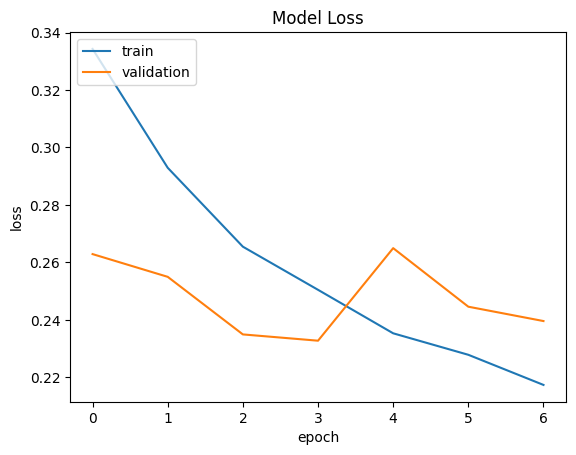

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
# prediction = model.predict(test_datagen)
# prediction

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming Y_pred and Y_true are already defined
# Y_pred is the output from model.predict, Y_pred_classes is obtained by np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)  # Make sure y_test is correctly prepared

# Calculate Precision, Recall, and F1 Score
precision = precision_score(Y_true, Y_pred_classes)
recall = recall_score(Y_true, Y_pred_classes)
f1 = f1_score(Y_true, Y_pred_classes)

# Calculate the probabilities for the positive class
Y_pred_probs = Y_pred[:, 1]  # assuming your model outputs probabilities for each class

# ROC AUC Score
roc_auc = roc_auc_score(Y_true, Y_pred_probs)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Precision: 0.87
Recall: 0.74
F1 Score: 0.80
ROC AUC Score: 0.96


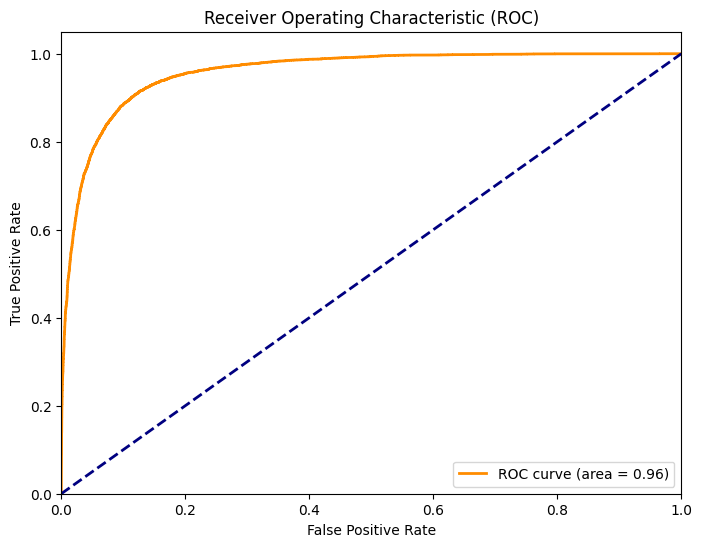

In [21]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_true, Y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


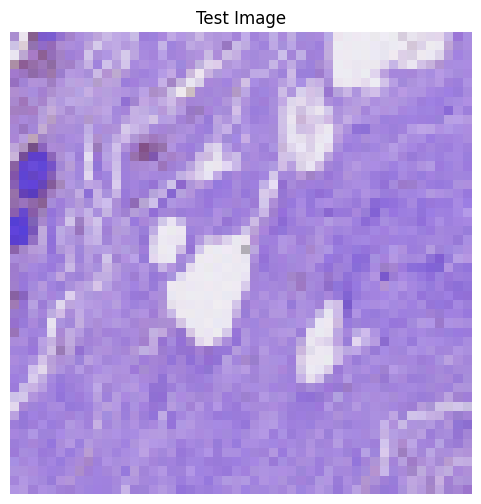

1/1 [==============================] - 1s 1s/step
Predicted Diagnosis: Non-Cancerous
Calcification Type: No Calcification
True Diagnosis: Non-Cancerous


In [22]:
# Define a mapping of class indices to human-readable labels
class_labels = {
    0: 'Non-Cancerous',
    1: 'Cancerous',
}

# Define a mapping of calcification types
calcification_types = {
    0: 'No Calcification',
    1: 'PLEOMORPHIC',
    2: 'AMORPHOUS',
    3: 'PUNCTATE',
    4: 'LUCENT_CENTER',
    5: 'VASCULAR',
    6: 'FINE_LINEAR_BRANCHING',
    7: 'COARSE',
    8: 'ROUND_AND_REGULAR-LUCENT_CENTER',
    9: 'PLEOMORPHIC-FINE_LINEAR_BRANCHING',
    10: 'ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE',
    11: 'ROUND_AND_REGULAR-EGGSHELL',
    12: 'PUNCTATE-PLEOMORPHIC',
    13: 'DYSTROPHIC',
    14: 'LUCENT_CENTERED',
    15: 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC',
    16: 'ROUND_AND_REGULAR',
    17: 'ROUND_AND_REGULAR-LUCENT_CENTERED',
    18: 'AMORPHOUS-PLEOMORPHIC',
    19: 'LARGE_RODLIKE-ROUND_AND_REGULAR',
    20: 'PUNCTATE-AMORPHOUS',
    21: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER',
    22: 'VASCULAR-COARSE-LUCENT_CENTERED',
    23: 'LUCENT_CENTER-PUNCTATE',
    24: 'ROUND_AND_REGULAR-PLEOMORPHIC',
    25: 'EGGSHELL',
    26: 'PUNCTATE-FINE_LINEAR_BRANCHING',
    27: 'VASCULAR-COARSE',
    28: 'ROUND_AND_REGULAR-PUNCTATE',
    29: 'SKIN-PUNCTATE-ROUND_AND_REGULAR',
    30: 'SKIN-PUNCTATE',
    31: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED',
    32: 'PUNCTATE-ROUND_AND_REGULAR',
    33: 'LARGE_RODLIKE',
    34: 'AMORPHOUS-ROUND_AND_REGULAR',
    35: 'PUNCTATE-LUCENT_CENTER',
    36: 'SKIN',
    37: 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA',
    38: 'COARSE-PLEOMORPHIC',
    39: 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS',
    40: 'COARSE-LUCENT_CENTER',
    41: 'MILK_OF_CALCIUM',
    42: 'COARSE-ROUND_AND_REGULAR',
    43: 'SKIN-COARSE-ROUND_AND_REGULAR',
    44: 'ROUND_AND_REGULAR-AMORPHOUS',
    45: 'PLEOMORPHIC-PLEOMORPHIC'
}
def img_plot(arr, index=0):
    # Check if the index is within the bounds of the array
    if index >= len(arr):
        print("Index is out of bounds.")
        return

    # Normalize the image to the range [0, 1] if not already
    img = arr[index].astype('float32')
    if img.max() > 1.0:
        img /= 255.0  # Assumes the max value could be 255, common in image data

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title('Test Image')
    plt.axis('off')  # Hide the axes
    plt.show()

# Ensure X_test is correctly prepared and in the expected format
index = 90  # Example index, ensure this is within the bounds of X_test
if index < len(X_test):
    img_plot(X_test, index)

    input_image = X_test[index:index+1]
    predicted_results = model.predict(input_image)
    predicted_class_index = np.argmax(predicted_results, axis=1)[0]
    true_class_index = np.argmax(y_test[index], axis=0)  # Adjust if y_test is not one-hot encoded

    predicted_label = class_labels[predicted_class_index]
    true_label = class_labels[true_class_index]
    calcification_type = calcification_types.get(predicted_class_index, "Unknown")

    print('Predicted Diagnosis:', predicted_label)
    print('Calcification Type:', calcification_type)
    print('True Diagnosis:', true_label)
else:
    print("The specified index is out of the range of the dataset.")


In [23]:
model.save('efficientNet_Hist.h5')

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.